In [2]:
# Exploratory Data Analysis Libraries and 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

# Research Goal
The idea behind this analysis is to demonstrate the uncertainty principles inherent within the Bayesian Modeling Context as I attempt to investigate features related to breast cancer. The data set will be cleaned, subset, partioned and analyzed for apparent relationships.

In [3]:
# Load Data into Data Frame
data = pd.read_csv(r"C:\Users\James\Documents\breast_cancer.csv")
column_names = data.columns
column_names

Index(['ID', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
%config IPCompleter.greedy=True

In [5]:
# Construct DataFrame
df = pd.DataFrame(data=data, columns=column_names)
df.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All rows appear to have the same count, 569. Next, must investigate if there's any missing data

In [6]:
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
# Utilize Means of samples only

data = df.loc[:, 'diagnosis':'concavity_mean']
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980


In [8]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800


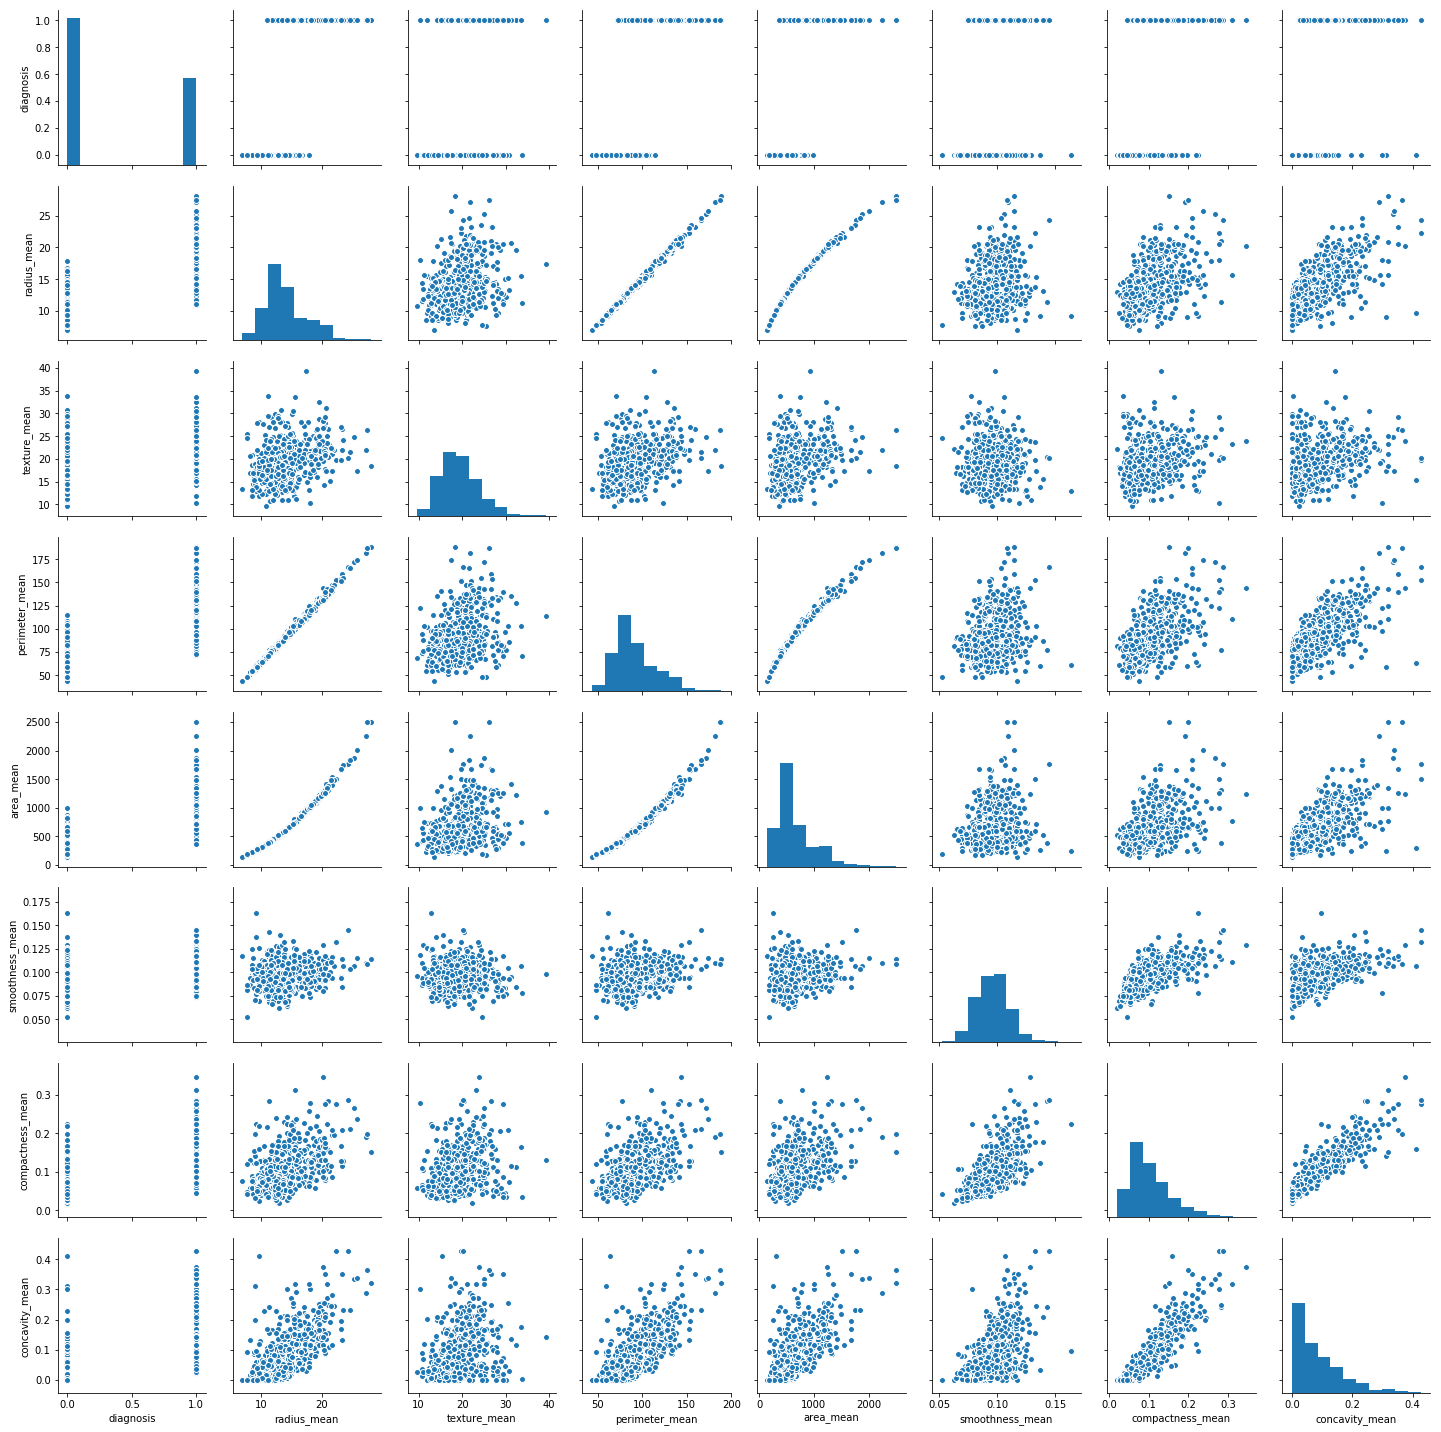

In [9]:
sns.pairplot(data)
plt.show()

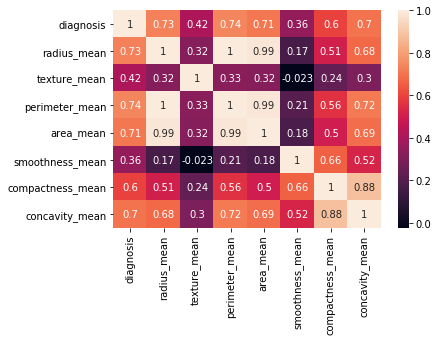

In [10]:
# Correlation Matrix

corr = data.corr()

# Heatmap of Correlations

sns.heatmap(corr, annot=True)

plt.show()

# Logistic Regression Model
I select two of the available features, smoothness & texture, and apply a logistic framework to create samples from. Under the PYMC3 framework, GLM allows for a patsy string along with the relationship of the variables. I'll be assuming a linear relationship between diagnosis status (Malignant or Benign / presence [1] or abscence [0]). Within this model context, priors for the intercept, smoothness & texture are given a Normal distribution (0, 10^12). This lets the data speak for itself and the likelihood, as a Binomial distribution. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [texture_mean, smoothness_mean, Intercept]
Sampling 2 chains: 100%|████████████████| 9000/9000 [02:19<00:00, 64.44draws/s]
The number of effective samples is smaller than 25% for some parameters.


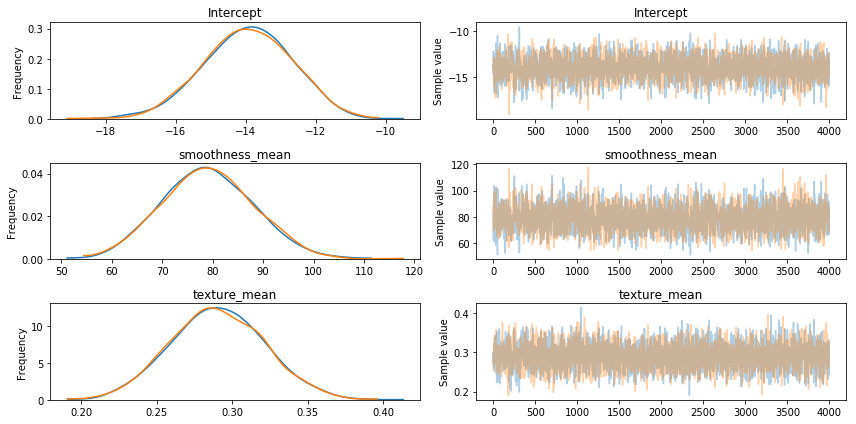

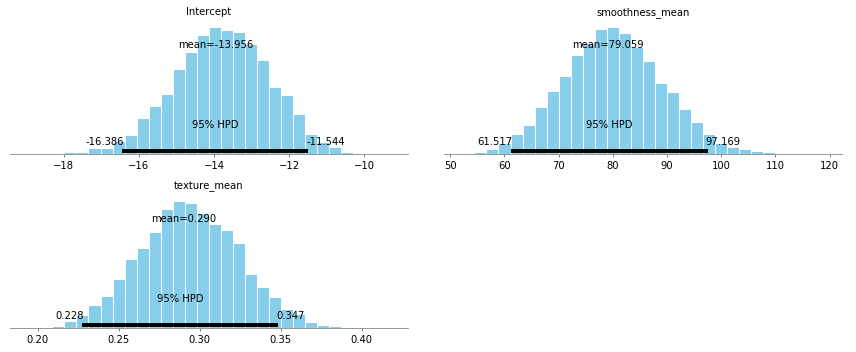

In [11]:
import pymc3 as pm

with pm.Model() as model:
    pm.glm.GLM.from_formula('diagnosis ~ smoothness_mean + texture_mean', data, family=pm.glm.families.Binomial())
    trace = pm.sample(4000)

    
pm.traceplot(trace)
pm.plot_posterior(trace)
plt.show()
    

# Modeling Uncertainty
Instead of one logistic function, we get many. The benefit of this framework is the modeling of uncertainty as evidenced by the width between the furthest most regression lines. This also highlights the ramifications of non-accepted parameters (via NUTS sampler) in which case the sample may not converge. You can see from the traces above texture doesn't give a smooth curve, and for the logistic regression below (since this is a 2-D relationship), we will need a fixed value for all but one of the coefficients. 

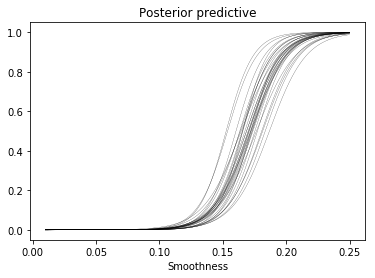

In [12]:
# Model uncertainty with fixed Texture Mean
lm = lambda x, samples: 1 / (1 + np.exp(-(samples['Intercept'] +
                                          samples['smoothness_mean']*x + samples['texture_mean'].mean())))
pm.plot_posterior_predictive_glm(trace, lm=lm, eval=np.linspace(0.01, 0.25, 1000))
plt.xlabel("Smoothness")
plt.show()                                          

In [13]:
ppc = pm.sample_posterior_predictive(trace, samples=500, model=model)

100%|███████████████████████████████████████| 500/500 [00:01<00:00, 371.91it/s]


In [14]:
ppc

{'y': array([[1, 0, 1, ..., 1, 1, 0],
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 1, 0],
        ...,
        [0, 0, 1, ..., 1, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 1, ..., 1, 1, 0]])}

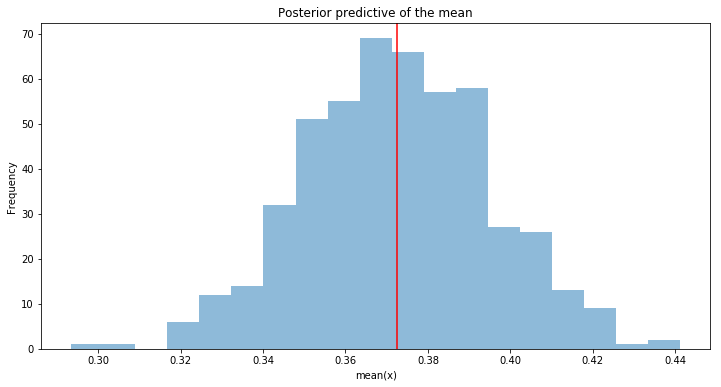

In [16]:
# Sample from the posterior
_, ax = plt.subplots(figsize=(12, 6))
ax.hist([n.mean() for n in ppc['y']], bins=19, alpha=0.5)
ax.axvline(data['diagnosis'].mean(), c='r')
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()

# Evaluating Evidence
Posterior Predictive Checks are useful for evaluating the performance of your model, and it also provides insight into the sampling mechanics. From my graph above, you can see the range of guesses, from as low as 30% Malignant to as high as 44% Malignant. The red line indicates actual prevalance of around 37.2%, which aligns with the peak of the sampling distributions. Although imperfect, this model does a reasonable job at producing effective ranges for discovery. 